# Here we are taking student data as input and classifying  whether he will get placed or not. If placed how much salary he can get. Here the algorithm used is RandomForestRegression and LogisticRegression.

In [42]:
# Load necessary library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

df = pd.read_csv("E:\Major project\Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# EXPLORATORY DATA ANALYSIS

In [5]:
print(df.shape)
print(df.columns)

(215, 15)
Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')


In [6]:
#columns with missing values
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

salary    67
dtype: int64

In [7]:
#numerical features
num_ft=[features for features in df.columns if(df[features].dtypes!='O')]
num_ft

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [8]:
#discrete numerical features
dt_num_ft=[features for features in num_ft if((len(df[features].unique())<25))]
dt_num_ft


[]

In [9]:
#continuous numerical features
continuous_features=[features for features in num_ft if features not in dt_num_ft+['sl_no']]
continuous_features

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

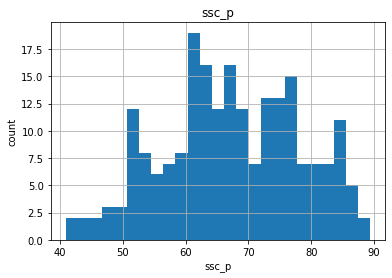

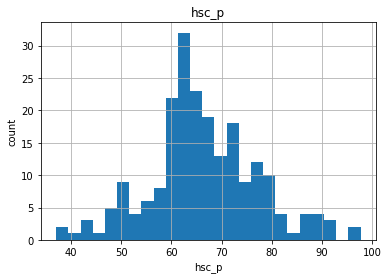

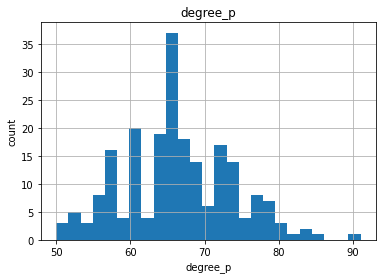

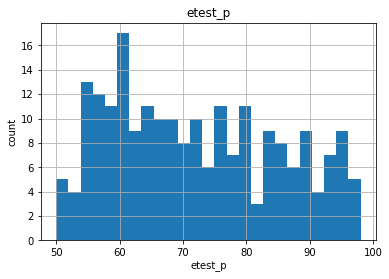

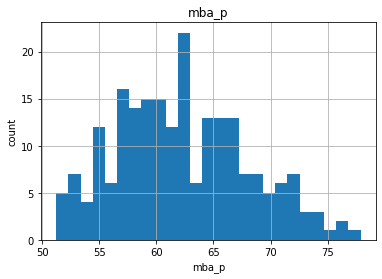

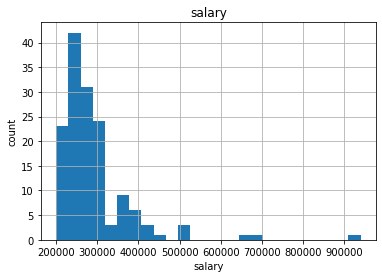

In [10]:
for features in continuous_features:
    data=df.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel('count')
    plt.title(features)
    plt.show()
    

In [11]:
#categorical features
cat_ft=[ft for ft in df.columns if(df[ft].dtypes=='O')]
cat_ft

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [12]:
df[cat_ft].head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


In [13]:
for ft in cat_ft:
    print('the feature is {} and no.of categories are {}'.format(ft,len(df[ft].unique())))

the feature is gender and no.of categories are 2
the feature is ssc_b and no.of categories are 2
the feature is hsc_b and no.of categories are 2
the feature is hsc_s and no.of categories are 3
the feature is degree_t and no.of categories are 3
the feature is workex and no.of categories are 2
the feature is specialisation and no.of categories are 2
the feature is status and no.of categories are 2


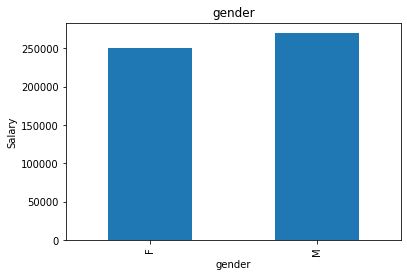

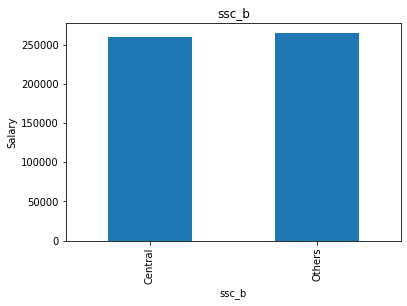

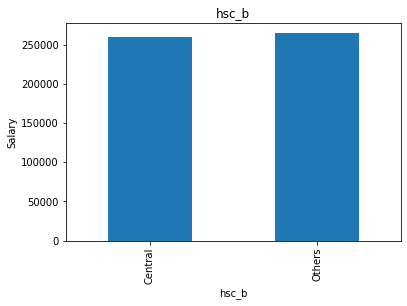

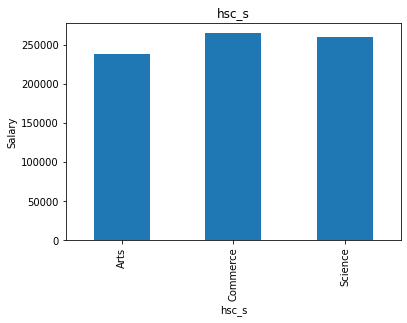

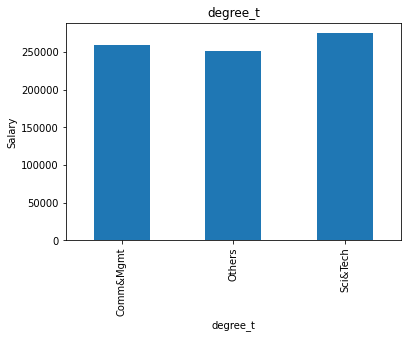

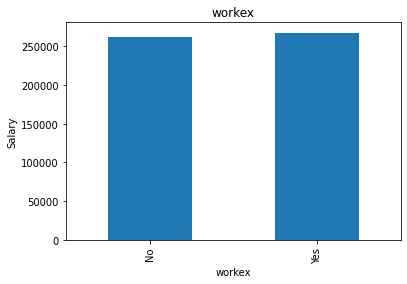

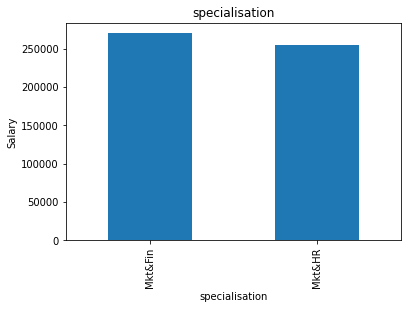

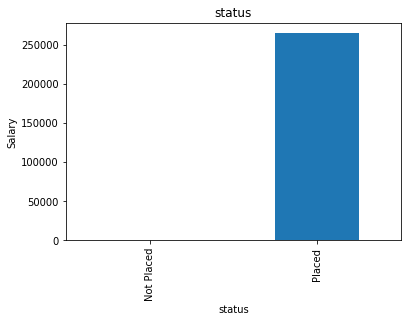

In [14]:
for ft in cat_ft:
    data=df.copy()
    data.groupby(ft)['salary'].median().plot.bar()
    plt.xlabel(ft)
    plt.ylabel('Salary')
    plt.title(ft)
    plt.show()

In [15]:
df['salary']=df['salary'].fillna(0)

In [16]:
# now columns with missing values
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

# Classification Model and Prediction

In [17]:
feat=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
for ft in feat:
    df_ft='ft'+'_'+ft
    df_ft=pd.get_dummies(df[ft],prefix=ft)
    ft1=df.join(df_ft)
    df=ft1

In [18]:
df.drop(['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status'],axis=1,inplace=True)

In [19]:
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,...,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,...,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,0,1,0,...,1,0,0,1,1,0,1,0,0,1
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,0,1,0,...,0,1,0,0,0,1,1,0,0,1
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,1,0,0,...,0,1,0,0,1,0,0,1,0,1


In [20]:
pd.pandas.set_option('display.max_columns',None)

In [21]:
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1


In [22]:
x=df.loc[:,df.columns!='salary']
y=df.salary


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [25]:
x_train

array([[-1.41902199, -0.41062939, -0.02969098, ..., -0.90029235,
        -0.64922077,  0.64922077],
       [ 0.48603784,  0.45569151, -0.94242717, ...,  1.1107503 ,
        -0.64922077,  0.64922077],
       [ 0.27792206, -0.07372682,  0.02399938, ..., -0.90029235,
        -0.64922077,  0.64922077],
       ...,
       [ 0.19787753,  0.93698089,  0.7577677 , ..., -0.90029235,
        -0.64922077,  0.64922077],
       [-0.9227459 , -0.41062939, -0.58449141, ..., -0.90029235,
        -0.64922077,  0.64922077],
       [ 1.07836736,  0.55194938, -0.76345929, ...,  1.1107503 ,
        -0.64922077,  0.64922077]])

In [26]:
#RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=10,random_state=0)
reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [28]:
y_pred=reg.predict(x_test)
y_pred

array([     0., 253600., 292400.,      0., 248700.,      0., 228700.,
       253000.,      0., 326200., 280800., 287500., 355600., 271000.,
       461700., 249500., 247200.,      0., 431000.,      0.,      0.,
            0., 253600.,      0.,      0.,      0., 295000., 256700.,
       251000., 316600., 342100.,      0., 270400.,      0.,      0.,
       237500., 339500., 254800., 473100., 421500.,      0.,      0.,
       278000.])

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8072449262224908

# Building classification model on same dataset by taking status as a dependent variable i.e,whether he is placed or not

In [30]:
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1


In [31]:
df.drop(['salary','status_Not Placed'],axis=1,inplace=True)

In [32]:
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1
1,2,79.33,78.33,77.48,86.5,66.28,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,3,65.00,68.00,64.00,75.0,57.80,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0
4,5,85.80,73.60,73.30,96.8,55.50,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1


In [33]:
x1=df.iloc[:,:-1].values
y1=df.iloc[:,-1].values

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=0)

In [35]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [36]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)


LogisticRegression()

In [37]:

y_pred1=classifier.predict(x_test)

In [38]:
y_pred1

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

# Evaluate

In [39]:
#Making confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred1)
print(cm)
print(accuracy_score(y_test,y_pred1))

[[12  7]
 [ 4 42]]
0.8307692307692308


In [40]:
#k cross validation
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print("Accuracy : {}".format(accuracies.mean()*100))
print("standard deviation : {}".format(accuracies.std()*100))

Accuracy : 87.33333333333334
standard deviation : 9.165151389911681


C:\Users\Anshu Roy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


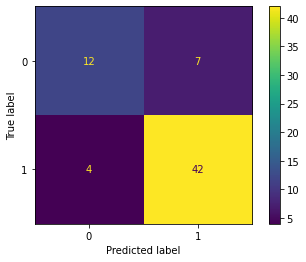

In [43]:
#Plotting confusion matrix
disp = plot_confusion_matrix(classifier,x_test,y_test)

In [44]:
#f1 Score
f1_score(y_test,y_pred1,average='weighted')

0.8261885482938114